Nombre de archivo CSV: titanic


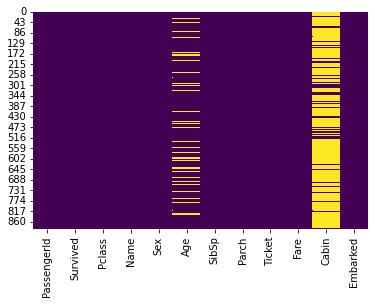

In [ ]:
# LECTURA DE UN ARCHIVO CSV
import pandas as pd
from  math import isnan
import seaborn as sns


nombreArch = input("Nombre de archivo CSV: ")
datosOrigen = pd.read_csv(nombreArch+'.csv', encoding='UTF8')
#datosOrigen.head()
#datosOrigen.info()
#datosOrigen.describe()
sns.heatmap(datosOrigen.isnull(), cbar=False, cmap='viridis')


In [ ]:
datosOrigen.head()
#datosOrigen.info()
#datosOrigen.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
datosOrigen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
datosOrigen.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
nombreArch = input("Nombre de archivo CSV: ")
datosOrigen = pd.read_csv(nombreArch+'.csv', encoding='UTF8')

# SELECCION DE ALGUNOS ATRIBUTOS
quitarCabin = datosOrigen[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]
#quitarCabin.info()
#print(ds_clean.Embarked.isnull().sum())

# ELIMINACIÓN DE ALGUNOS ATRIBUTOS
#quitaCabin2 = datosOrigen.drop(columns=['Cabin'])
#quitaCabin2.info()

#SELECCION DE LA COLUMNA A LIMPIAR
#seleccion = datosOrigen[['Embarked']]
#limpia = seleccion.fillna('S')
#limpia.info()

mr = 0
mrs = 0
miss = 0
master = 0
otro = 0

listamr = []
listamiss = []
listamrs = []
listamaster = []
listaotro = []

for i in range(len(datosOrigen)):
  dato = datosOrigen.loc[i,"Name"]
  age = datosOrigen.loc[i,"Age"]
  if isnan(age):
#    print("BRINCO******************************")
    if 'Mr.' in dato:
      mr += 1
    elif 'Mrs.' in dato:
      mrs += 1
    elif 'Master.' in dato:
      master += 1
    elif 'Miss.' in dato:
      miss += 1
    else:
      otro += 1
    continue
  age = float(age)
  #print(dato,age)
  if 'Mr.' in dato:
    listamr.append(age)
  elif 'Mrs.' in dato:
    listamrs.append(age)
  elif 'Master.' in dato:
    listamaster.append(age)
  elif 'Miss.' in dato:
    listamiss.append(age)
  else:
    listaotro.append(age)
  #print(datosOrigen.loc[i,"PassengerId"], datosOrigen.loc[i,"Name"])

df = pd.DataFrame(listamr)
print("****\nMISTER:")
print('MEDIANA',df.median())
print('MODA',df.mode())
print('MEDIA',df.mean())
print('Cuenta',len(listamr))
print('faltan',mr)
print()
df = pd.DataFrame(listamrs)
print("****\nMISSTRESS:")
print('MEDIANA',df.median())
print('MODA',df.mode())
print('MEDIA',df.mean())
print('Cuenta',len(listamrs))
print('faltan',mrs)
print()
df = pd.DataFrame(listamaster)
print("****\nMASTER:")
print('MEDIANA',df.median())
print('MODA',df.mode())
print('MEDIA',df.mean())
print('Cuenta',len(listamaster))
print('faltan',master)
print()
df = pd.DataFrame(listamiss)
print("****\nMISS:")
print('MEDIANA',df.median())
print('MODA',df.mode())
print('MEDIA',df.mean())
print('Cuenta',len(listamiss))
print('faltan',miss)
print()
df = pd.DataFrame(listaotro)
print("****\nOTRO:")
print('MEDIANA',df.median())
print('MODA',df.mode())
print('MEDIA',df.mean())
print('Cuenta',len(listaotro))
print('faltan',otro)

Nombre de archivo CSV: titanic
****
MISTER:
MEDIANA 0    30.0
dtype: float64
MODA       0
0  19.0
1  25.0
MEDIA 0    32.36809
dtype: float64
Cuenta 398
faltan 119

****
MISSTRESS:
MEDIANA 0    35.0
dtype: float64
MODA       0
0  24.0
MEDIA 0    35.898148
dtype: float64
Cuenta 108
faltan 17

****
MASTER:
MEDIANA 0    3.5
dtype: float64
MODA      0
0  1.0
1  4.0
MEDIA 0    4.574167
dtype: float64
Cuenta 36
faltan 4

****
MISS:
MEDIANA 0    21.0
dtype: float64
MODA       0
0  18.0
MEDIA 0    21.773973
dtype: float64
Cuenta 146
faltan 36

****
OTRO:
MEDIANA 0    44.5
dtype: float64
MODA       0
0  24.0
MEDIA 0    42.384615
dtype: float64
Cuenta 26
faltan 1


In [ ]:
nombreArch = input("Nombre de archivo CSV: ")
datosOrigen = pd.read_csv(nombreArch+'.csv', encoding='UTF8')
salida = open("datoslimpios.csv",'w')
quitarCabin = datosOrigen[['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']]

for i in range(len(datosOrigen)):
  pa = datosOrigen.loc[i,"PassengerId"]
  su = datosOrigen.loc[i,"Survived"]
  cl = datosOrigen.loc[i,"Pclass"]
  nam = datosOrigen.loc[i,"Name"]
  se = datosOrigen.loc[i,"Sex"]
  ag = datosOrigen.loc[i,"Age"]
  si = datosOrigen.loc[i,"SibSp"]
  pr = datosOrigen.loc[i,"Parch"]
  ti = datosOrigen.loc[i,"Ticket"]
  fa = datosOrigen.loc[i,"Fare"]
  em = datosOrigen.loc[i,"Embarked"]

  #print(pa,su,cl,nam,se,ag,si,pr,ti,fa,em)
  if pd.isnull(em):
    em = 'S'
  if pd.isnull(ag):
    if 'Mr.' in nam:
      ag = 30
      #print("************************************************")
    elif 'Mrs.' in nam:
      ag = 35
      #print("************************************************")
    elif 'Miss.' in nam:
      ag = 21
      #print("************************************************")
    elif 'Master.' in nam:
      ag = 3.5
      #print("************************************************")
    else:
      ag = 42
      #print("************************************************")
  #print(pa,su,cl,nam,se,ag,si,pr,ti,fa,em)
  salida.write(''+str(pa)+','+str(su)+','+str(cl)+','+str(nam)+','+str(se)+','+str(ag)+','+str(si)+','+str(pr)+','+str(ti)+','+str(fa)+','+str(em)+'\n')
salida.close()

Nombre de archivo CSV: titanic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       891 non-null    int64  
 1   1       891 non-null    int64  
 2   2       891 non-null    int64  
 3   3       891 non-null    object 
 4   4       891 non-null    object 
 5   5       891 non-null    object 
 6   6       891 non-null    float64
 7   7       891 non-null    int64  
 8   8       891 non-null    int64  
 9   9       891 non-null    object 
 10  10      891 non-null    float64
 11  11      891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


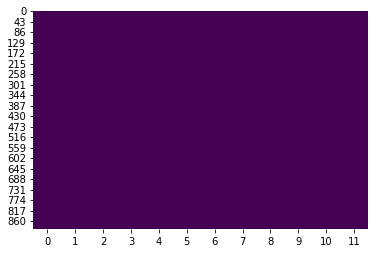

In [ ]:
# VALIDACIÓN DE DATOS LIMPIOS
datosLimpios = pd.read_csv("datoslimpios.csv", encoding='UTF8', header=None)
sns.heatmap(datosLimpios.isnull(), cbar=False, cmap='viridis')
datosLimpios.info()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


Nombre de archivo CSV: datoslimpios
atributo, cuenta, media, mediana, desvia, sesgo, curtosis /moda
1 890 446.5 446.5 257.0651668351821 0.0 -1.2
0        2
1        3
2        4
3        5
4        6
      ... 
885    887
886    888
887    889
888    890
889    891
Length: 890, dtype: int64



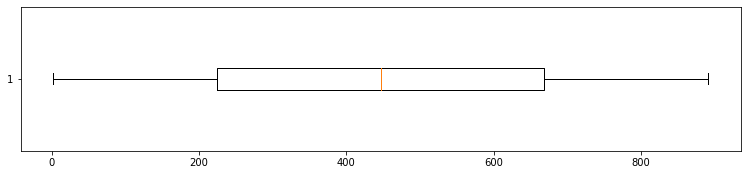

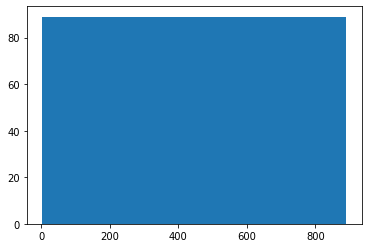

0 890 0.3842696629213483 0.0 0.4866956319007263 0.4766469365587006 -1.77680558506225840    0
dtype: int64



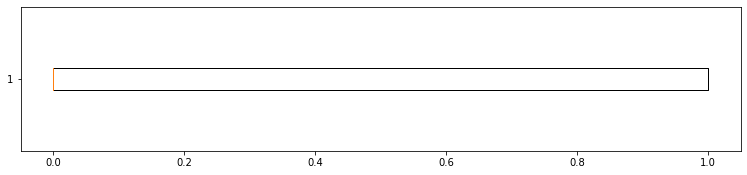

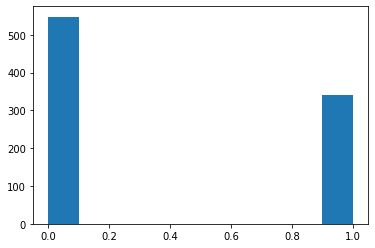

3 890 2.3078651685393257 3.0 0.8362195608233012 -0.628766935098649 -1.28217692343857140    3
dtype: int64



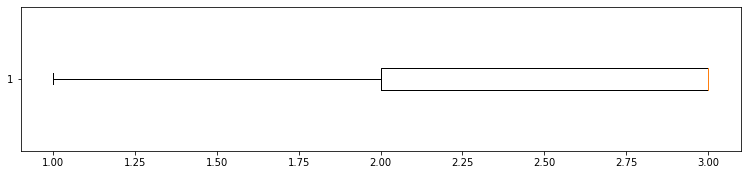

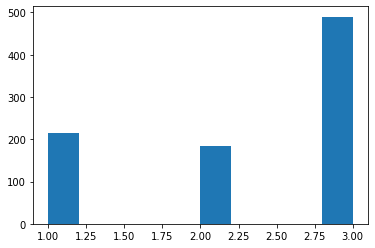

Braund 890
moda, distribucion de frecuencias
 Mr. Owen Harris 890
moda, distribucion de frecuencias
male 890
moda, distribucion de frecuencias
22.0 890 29.393449438202246 30.0 13.26479649281335 0.43508586862793436 0.77931843488046890    30.0
dtype: float64



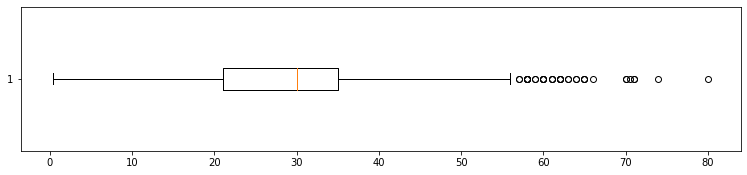

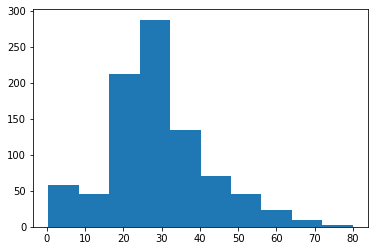

1.1 890 0.5224719101123596 0.0 1.1032473601510504 3.695820219844582 17.8730531985462270    0
dtype: int64



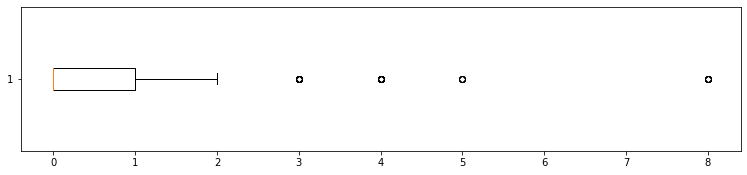

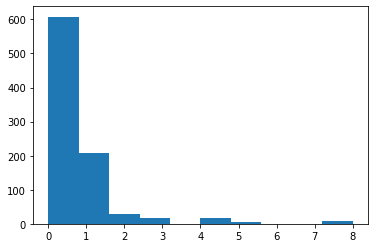

0.1 890 0.38202247191011235 0.0 0.8064087782289336 2.74713922844635 9.7643574852996660    0
dtype: int64



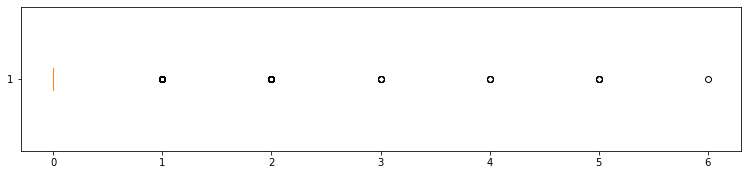

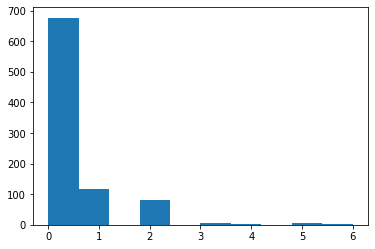

A/5 21171 890
moda, distribucion de frecuencias
7.25 890 32.232246404494376 14.4542 49.71431749441972 4.785121638770901 33.3672198589425550    8.05
dtype: float64



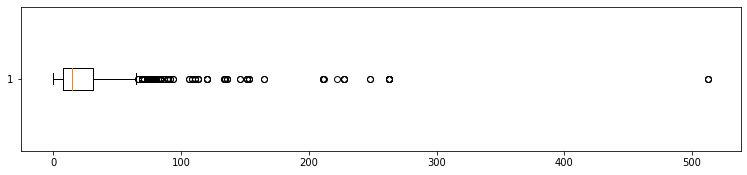

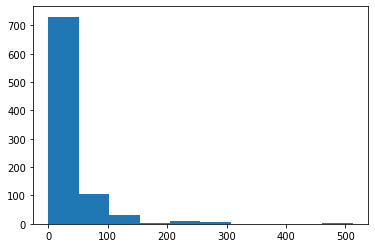

S 890
moda, distribucion de frecuencias


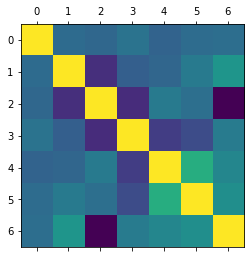

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,1,0,3,22.0,1.1,0.1,7.25
1,1.000,-0.007,-0.034,0.041,-0.057,-0.003,0.012
0,-0.007,1.000,-0.338,-0.079,-0.035,0.081,0.257
3,-0.034,-0.338,1.000,-0.353,0.083,0.019,-0.549
22.0,0.041,-0.079,-0.353,1.000,-0.265,-0.188,0.098
1.1,-0.057,-0.035,0.083,-0.265,1.000,0.415,0.160
0.1,-0.003,0.081,0.019,-0.188,0.415,1.000,0.216
7.25,0.012,0.257,-0.549,0.098,0.160,0.216,1.000


In [ ]:
def estadisticaNumerica(dataset, variable):
  cuenta = len(dataset[variable])
  media = dataset[variable].mean(skipna = False)
  mediana = dataset[variable].median(skipna = False)
  moda = dataset[variable].mode(dropna = False)
  desvia = dataset[variable].std(skipna = False)
  sesgo = dataset[variable].skew(skipna = False)
  curtosis = dataset[variable].kurtosis(skipna = False)
  print(variable, cuenta, media, mediana, desvia, sesgo, curtosis, end='')
  if len(moda) < 2:
    print(moda)
  else:
    print()
    print(moda)
  print()
  datos = dataset[variable]
  figura = plt.figure(figsize =(10, 2))
  ax = figura.add_axes([0, 0, 1, 1])
  ax.boxplot(datos,vert=False)
  plt.show()
  hist, bin_edges = np.histogram(datos, 10)
  plt.hist(datos, bins=bin_edges)
  plt.show()

def estadisticaCategorica(dataset, variable):
  cuenta = len(dataset[variable])
  print(variable, cuenta)
  print('moda, distribucion de frecuencias')

nombreArch = input("Nombre de archivo CSV: ")
datosOrigen = pd.read_csv(nombreArch+'.csv', encoding='UTF8')
columnas = datosOrigen.columns
tipos = datosOrigen.dtypes
print('atributo, cuenta, media, mediana, desvia, sesgo, curtosis /moda')
for i in range(len(columnas)):
  atributo = columnas[i]
  tipo = str(tipos[i])
  #print(atributo," -- ",tipo)
  if tipo.find('int') > -1 or tipo.find('float') > -1:
    estadisticaNumerica(datosOrigen, atributo)
  else:
    estadisticaCategorica(datosOrigen, atributo)

plt.matshow(datosOrigen.corr())
plt.show()
#datosOrigen.corr()
corr = datosOrigen.corr()
corr.style.background_gradient(cmap="Greens").set_precision(3)

In [ ]:
datosLimpios.columns = ['PassengerId','Survived','Pclass','Name','Title','Sex','Age','SibSp','Parch','Ticket','Fare','Embarked']

In [ ]:
datosLimpios.head(1)

,PassengerId,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.25,S


In [ ]:
clase1 = 0
clase2 = 0
clase3 = 0

clase1Suvirve = 0
clase2Suvirve = 0
clase3Suvirve = 0

for i in range(len(datosLimpios)):
  Clase = datosLimpios.loc[i,"Pclass"]
  suvirve = datosLimpios.loc[i,"Survived"]
  if Clase == 1:
    clase1 += 1
  elif Clase == 2:
    clase2 += 1
  elif Clase == 3:
    clase3 += 1

  if Clase == 1 and suvirve == 1:
    clase1Suvirve += 1
  elif Clase == 2 and suvirve == 1:
    clase2Suvirve += 1
  elif Clase == 3 and suvirve == 1:
    clase3Suvirve += 1

print("Clase 1",clase1)
print("Clase 2",clase2)
print("Clase 3",clase3)

print("Clase 1 suvirve",clase1Suvirve)
print("Clase 2 suvirve",clase2Suvirve)
print("Clase 3 suvirve",clase3Suvirve)

Clase 1 216
Clase 2 184
Clase 3 491
Clase 1 suvirve 136
Clase 2 suvirve 87
Clase 3 suvirve 119
